![LipPike](https://upload.wikimedia.org/wikipedia/commons/3/32/Lip_Pike_Baseball.jpg "Lip Pike had Style")

### Back in the Good Ole Days of Base Ball...

In [1]:
cd ..

/Users/johnphillips/Desktop/DSI-Class-Stuff/BaseBall


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
# Start with reading the data sets from the pickles

teams = pd.read_pickle('data/teams.p') # Full Data
teams_num = pd.read_pickle('data/teams_num.p') # Numeric Features
new_reduced = pd.read_pickle('data/new_reduced.p') # Reduced from PCA
salaries = pd.read_pickle('data/salaries.p') # Team Salaries 1985 - 2016
rockies = pd.read_pickle('data/rockies.p') # 2017 Rockies Team Stats

### Which team was the best pre 1903?

In [5]:
# Start with finding old teams:

old_teams = teams[(teams['yearID'] < 1903)]

# Show old_teams along with year, name and some key features.
old_teams.loc[:, ('yearID', 'name', 'WinP', 'R', 'RA', 'ERA', 'SHO', 'SLG', 'attendance', 'LgWin', 'WSWin' )]

,yearID,name,WinP,R,RA,ERA,SHO,SLG,attendance,LgWin,WSWin
0,1871,Boston Red Stockings,0.666667,401,303,3.55,1,0.422012,0.0,0,0
1,1871,Chicago White Stockings,0.678571,302,241,2.76,0,0.373746,0.0,0,0
2,1871,Cleveland Forest Citys,0.344828,249,341,4.11,0,0.391231,0.0,0,0
3,1871,Fort Wayne Kekiongas,0.368421,137,243,5.17,1,0.293566,0.0,0,0
4,1871,New York Mutuals,0.484848,302,313,3.72,1,0.349715,0.0,0,0
5,1871,Philadelphia Athletics,0.750000,376,266,4.95,0,0.434817,0.0,1,0
6,1871,Rockford Forest Citys,0.160000,231,287,4.30,1,0.363900,0.0,0,0
7,1871,Troy Haymakers,0.464286,351,362,5.51,0,0.417468,0.0,0,0
8,1871,Washington Olympics,0.500000,310,303,4.37,0,0.368810,0.0,0,0
9,1872,Baltimore Canaries,0.648148,617,434,3.02,1,0.369953,0.0,0,0


In [6]:
# Some basic stats on the old teams:

old_teams[['R', 'RA', 'ERA', 'SHO', 'PPF', 'OPS', 'attendance']].describe()

,R,RA,ERA,SHO,PPF,OPS,attendance
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,632.918072,632.918072,3.547349,5.493976,100.346988,0.652594,75896.180723
std,233.056146,226.038490,1.019881,4.062238,6.029323,0.079398,113973.821590
min,24.000000,34.000000,1.220000,0.000000,60.000000,0.336493,0.000000
25%,470.500000,457.500000,2.815000,2.000000,97.000000,0.603263,0.000000
50%,668.000000,650.000000,3.440000,5.000000,100.000000,0.654051,0.000000
75%,816.500000,793.500000,4.175000,8.000000,104.000000,0.708371,150964.000000
max,1220.000000,1252.000000,8.000000,21.000000,141.000000,0.889770,474971.000000


In [7]:
# By comparison... How do the teams compare since the World Series started?

new_teams = teams[(teams['yearID'] > 1903)]
new_teams[['R', 'RA', 'ERA', 'SHO', 'PPF', 'OPS', 'attendance']].describe()

,R,RA,ERA,SHO,PPF,OPS,attendance
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2.404000e+03
mean,691.368136,691.368136,3.870441,10.372712,100.204243,0.712957,1.427913e+06
std,107.756343,109.362716,0.695535,4.889714,4.603131,0.052980,9.365853e+05
min,329.000000,331.000000,1.730000,0.000000,88.000000,0.529958,0.000000e+00
25%,624.000000,620.000000,3.430000,7.000000,97.000000,0.679397,6.336038e+05
50%,691.000000,691.000000,3.870000,10.000000,100.000000,0.715239,1.241350e+06
75%,758.000000,761.000000,4.320000,13.000000,103.000000,0.747055,2.086374e+06
max,1067.000000,1199.000000,6.710000,32.000000,129.000000,0.870036,4.483350e+06


   We can see the attendance has gone up dramatically.   
   Scoring and OPS have changed, but the old teams are still competitive.

### Side Note: the old team names were amusing: 

* [Boston Beaneaters](https://en.wikipedia.org/wiki/1897_Boston_Beaneaters_season "named by sportswriters in 1883, eventualy became the Braves franchise")
* [Cleveland Bronchos](https://www.baseball-reference.com/teams/CLE/1902.shtml "Its actually spelled with the 'h'!")
* [Baltimore Canaries](https://www.baseball-reference.com/teams/BLC/ "usually listed Lord Baltimore")
* [Fort Wayne Kekiongas](https://www.baseball-reference.com/teams/KEK/ "kekionga means Blackberry Patch")
* [Troy Haymakers](https://www.baseball-reference.com/teams/TRO/ "formally the Union Base Ball Club Lansingburgh")
* [New York Mutuals](https://www.baseball-reference.com/teams/NNA/ "played at the Elysian Fields")


### Can we predict which team would win the World Series before 1903?

In [8]:
# Start with train_test_split with old_teams
old_teams_num = old_teams.select_dtypes(exclude=['object', 'category'])

# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X = old_teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 
y = old_teams_num['WSWin']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

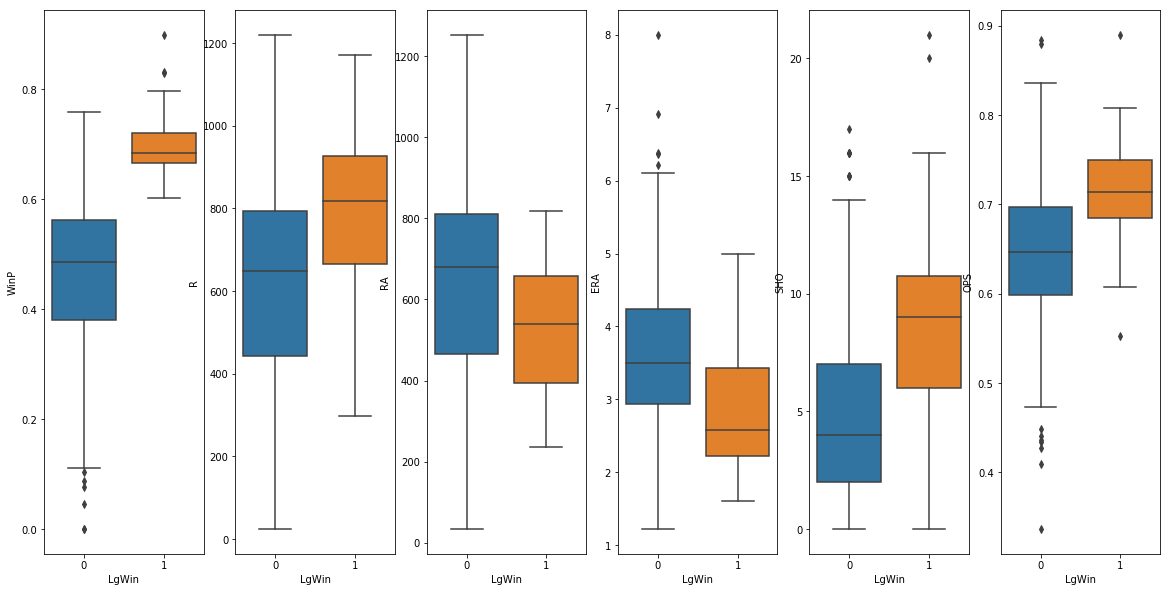

In [10]:
# Boxplots of key features 

fig = plt.figure(figsize=(20,10))
for i, feat in enumerate(['WinP', 'R', 'RA', 'ERA',  'SHO', 'OPS', ]):
    fig.add_subplot(1,6,i+1)
    sns.boxplot('LgWin', feat, data=old_teams)
    
    plt.tight_layout    

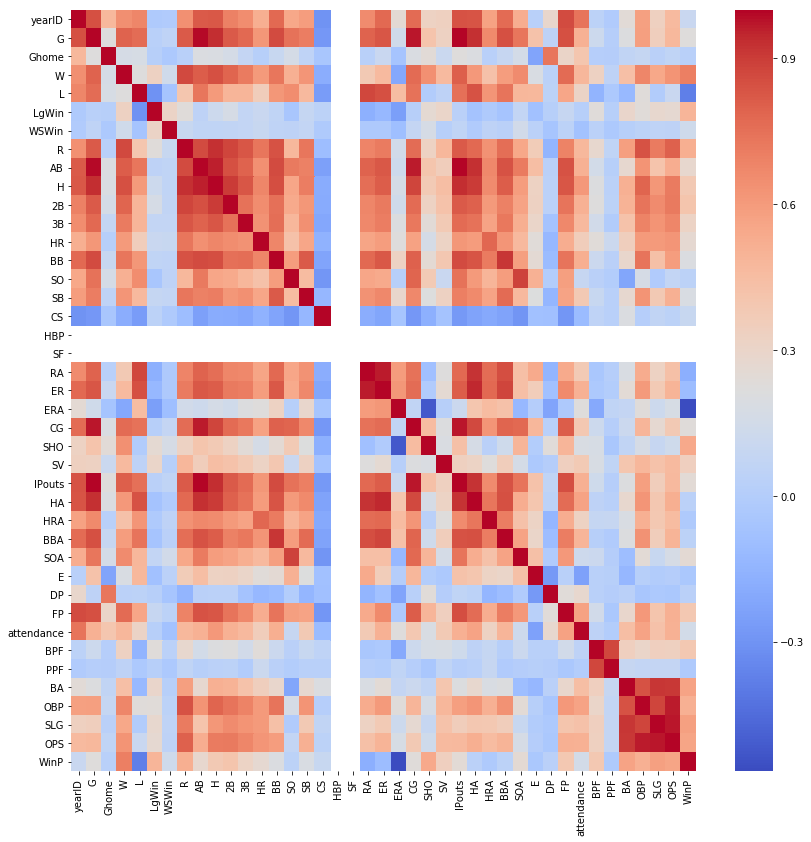

In [11]:
fig = plt.figure(figsize=(14,14))
sns.heatmap(old_teams_num.corr(), cmap="coolwarm")

### Unsupervised questions...

In [12]:
len(old_teams_num['yearID'].unique()) 

# Only 32 Seasons, so we can only predict one winner per season...

32

### Clustering to start...

In [13]:
old_model = KMeans(n_clusters=2, random_state=42).fit(old_teams_num)

In [14]:
predicted = old_model.labels_
centroids = old_model.cluster_centers_

#print("Predicted clusters to points: ", predicted)  # Here each point gets assigned a cluster...
#print("Location of centroids: ")
#print(centroids)  #coordinates of Centroids!

In [15]:
old_teams_num['predicted'] = predicted
old_teams_num.head(12)

/Users/johnphillips/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,yearID,G,Ghome,W,L,LgWin,WSWin,R,AB,H,...,FP,attendance,BPF,PPF,BA,OBP,SLG,OPS,WinP,predicted
0,1871,31,0.0,20,10,0,0,401,1372,426,...,0.838,0.0,103,98,0.310496,0.339385,0.422012,0.761397,0.666667,0
1,1871,28,0.0,19,9,0,0,302,1196,323,...,0.829,0.0,104,102,0.270067,0.304936,0.373746,0.678682,0.678571,0
2,1871,29,0.0,10,19,0,0,249,1186,328,...,0.814,0.0,96,100,0.276560,0.292079,0.391231,0.683310,0.344828,0
3,1871,19,0.0,7,12,0,0,137,746,178,...,0.803,0.0,101,107,0.238606,0.270860,0.293566,0.564426,0.368421,0
4,1871,33,0.0,16,17,0,0,302,1404,403,...,0.839,0.0,90,88,0.287037,0.303410,0.349715,0.653125,0.484848,0
5,1871,28,0.0,21,7,1,0,376,1281,410,...,0.845,0.0,102,98,0.320062,0.343632,0.434817,0.778449,0.750000,0
6,1871,25,0.0,4,21,0,0,231,1036,274,...,0.821,0.0,97,99,0.264479,0.290503,0.363900,0.654402,0.160000,0
7,1871,29,0.0,13,15,0,0,351,1248,384,...,0.845,0.0,101,100,0.307692,0.333847,0.417468,0.751315,0.464286,0
8,1871,32,0.0,15,15,0,0,310,1353,375,...,0.850,0.0,94,98,0.277162,0.301927,0.368810,0.670737,0.500000,0
9,1872,58,0.0,35,19,0,0,617,2576,747,...,0.829,0.0,106,102,0.289984,0.297349,0.369953,0.667303,0.648148,0


In [16]:
old_teams_num.tail(12)

,yearID,G,Ghome,W,L,LgWin,WSWin,R,AB,H,...,FP,attendance,BPF,PPF,BA,OBP,SLG,OPS,WinP,predicted
403,1902,138,72.0,74,60,0,0,675,4654,1248,...,0.955,337898.0,96,95,0.268156,0.327542,0.335196,0.662737,0.552239,1
404,1902,141,70.0,68,69,0,0,530,4802,1200,...,0.946,263700.0,97,97,0.249896,0.301261,0.297584,0.598845,0.496350,1
405,1902,141,70.0,70,70,0,0,633,4908,1383,...,0.945,217300.0,109,108,0.281785,0.322767,0.362469,0.685236,0.500000,1
406,1902,137,65.0,69,67,0,0,686,4840,1401,...,0.950,275395.0,96,96,0.289463,0.331974,0.389256,0.721230,0.507353,1
407,1902,137,67.0,52,83,0,0,566,4644,1167,...,0.943,189469.0,105,105,0.251292,0.305017,0.319552,0.624569,0.385185,1
408,1902,139,71.0,48,88,0,0,401,4571,1088,...,0.943,302875.0,99,101,0.238022,0.277835,0.290308,0.568144,0.352941,1
409,1902,137,73.0,83,53,1,0,775,4762,1369,...,0.953,420078.0,104,103,0.287484,0.335357,0.388912,0.724270,0.610294,1
410,1902,138,69.0,56,81,0,0,484,4615,1139,...,0.946,112066.0,104,105,0.246804,0.300744,0.292524,0.593269,0.408759,0
411,1902,142,71.0,103,36,1,0,775,4926,1410,...,0.958,243826.0,104,99,0.286236,0.336353,0.374137,0.710491,0.741007,1
412,1902,140,73.0,78,58,0,0,619,4736,1254,...,0.953,272283.0,99,99,0.264780,0.318458,0.352829,0.671287,0.573529,1


In [17]:
old_teams_num['predicted'].value_counts()

0    281
1    134
Name: predicted, dtype: int64

In [18]:
centroids = pd.DataFrame(centroids)
centroids

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1883.163701,97.448399,0.245552,46.750890,48.896797,0.11032,1.779359e-02,557.320285,3499.085409,895.693950,...,9.857651,0.891128,5007.811388,99.854093,100.249110,0.254910,0.291791,0.334304,0.626095,0.475386
1,1896.753731,139.544776,16.089552,70.701493,66.201493,0.11194,1.734723e-17,791.447761,4869.156716,1357.313433,...,28.873134,0.937776,224550.149254,100.791045,100.552239,0.278984,0.336507,0.371654,0.708161,0.516276


### DBSCAN

In [19]:
# Scale it first!
Xs = StandardScaler().fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 3, min_samples = 3)
dbscan.fit(Xs)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [21]:
labels = dbscan.labels_  
print(labels) 

# comprehension: what do these mean? How many are there?
# Observations that did not make it into a DB qualified cluster will recieve the label of -1

[ 0  0  0  1  0  0  0  0  0  2 -1 -1  2  0  0 -1 -1  0  1 -1  2 -1  0 -1  1
  0 -1  2  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  1  1  0 -1
 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  1
  0 -1 -1  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1 -1 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0

In [22]:
# how many clusters do we have?
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

5


In [23]:
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, labels))
# Clusters are terrible.

Silhouette Coefficient: -0.712


In [24]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Estimated number of clusters: 5
Homogeneity: 0.029
Completeness: 0.002
V-measure: 0.004
